In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

In [36]:
rename_dict =  {
    'correlation_v2': 'ARCHS4 Coexpression',
    'generif_overlap_zscore': 'GeneRIF',
    'autorif_overlap_zscore': 'AutoRIF',
#     'zscore_subset': 'Enrichr Co-occurrence (Subset)',
    'zscore': 'Enrichr Co-occurrence',
    'random': 'Random'
}

infile = './s4-merged_auc.dir/library_auc.txt'
plot_dataframe = pd.read_table(infile)
plot_dataframe.head()

# rename and filter
for key, value in rename_dict.items():
    plot_dataframe = plot_dataframe.replace(key, value)
plot_dataframe = plot_dataframe[[x in rename_dict.values() for x in plot_dataframe['normalization']]]
plot_dataframe.head()

term_name       auc          normalization  \
1  AKT1_human_kinase_ARCHS4_coexpression  0.680347                AutoRIF   
3  AKT1_human_kinase_ARCHS4_coexpression  0.986921    ARCHS4 Coexpression   
5  AKT1_human_kinase_ARCHS4_coexpression  0.590596                GeneRIF   
6  AKT1_human_kinase_ARCHS4_coexpression  0.550041                 Random   
7  AKT1_human_kinase_ARCHS4_coexpression  0.966118  Enrichr Co-occurrence   

                library  nr_genes  
1  ARCHS4_Kinases_Coexp       299  
3  ARCHS4_Kinases_Coexp       299  
5  ARCHS4_Kinases_Coexp       299  
6  ARCHS4_Kinases_Coexp       299  
7  ARCHS4_Kinases_Coexp       299

In [52]:
def boxplot(library):
    ggplot_dataframe = plot_dataframe[plot_dataframe['library'] == library]
    library = library.replace('_', ' ')
    %R -i ggplot_dataframe,library -h 900 -w 1500 -r 230 gp <- ggplot(ggplot_dataframe, aes(x=reorder(normalization, auc, FUN=median), y=auc, fill=normalization)) + geom_violin() + guides(fill=FALSE) + geom_boxplot(width=.1) + labs(x='', y='AUC', title=library) + theme_classic() + theme(axis.title.x = element_text(vjust=-1), axis.title.y = element_text(vjust=2.5), axis.line = element_line(colour = 'black', size=0.2), strip.background = element_rect(color='black', fill='white', size=0)) + coord_flip(); print(gp); 

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



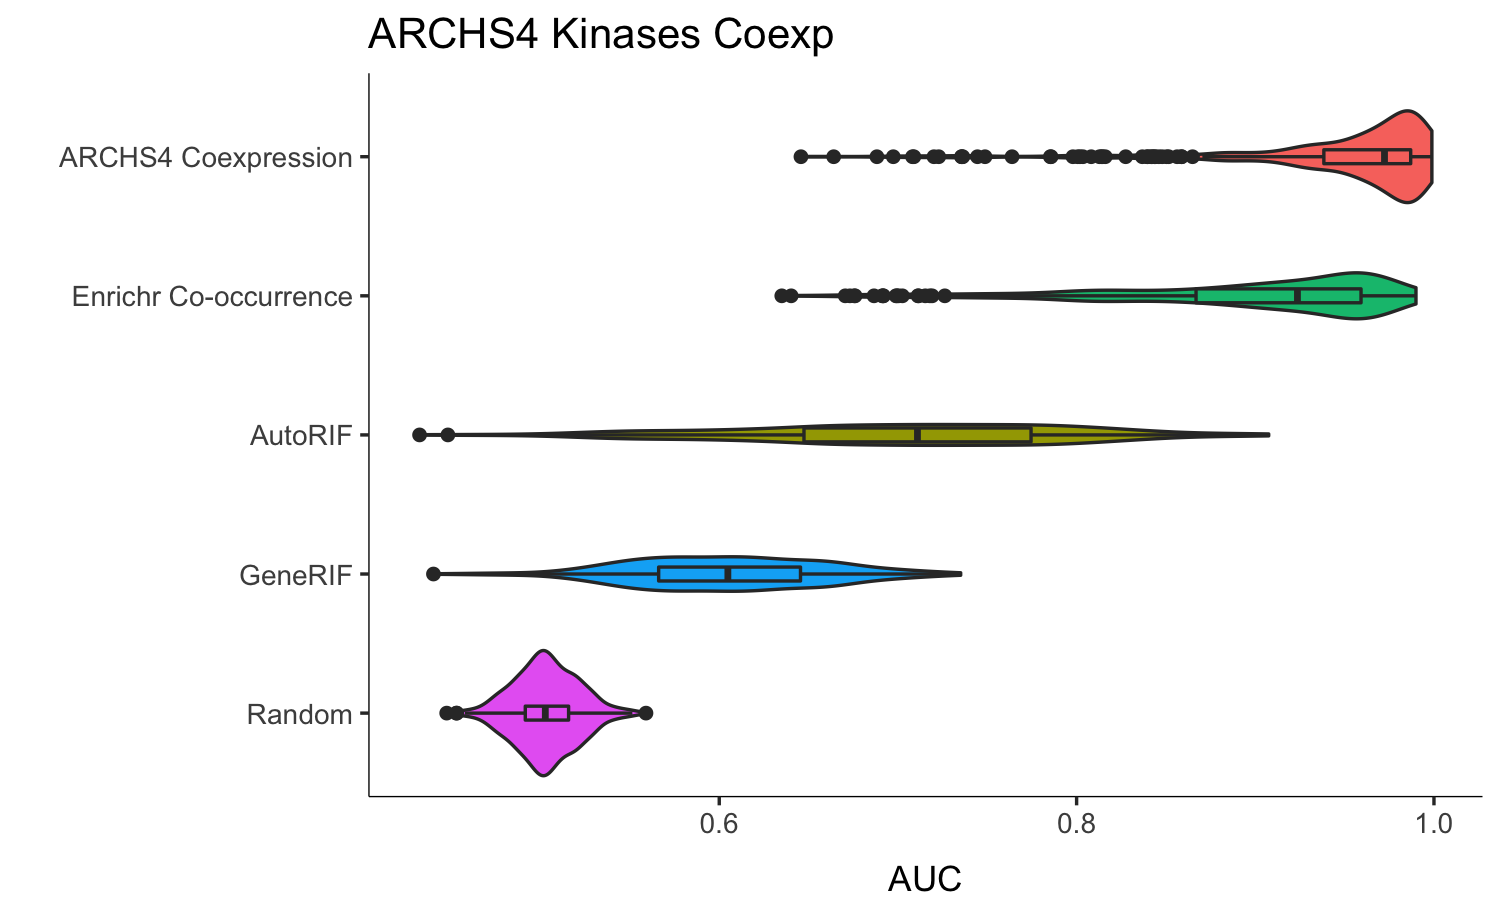

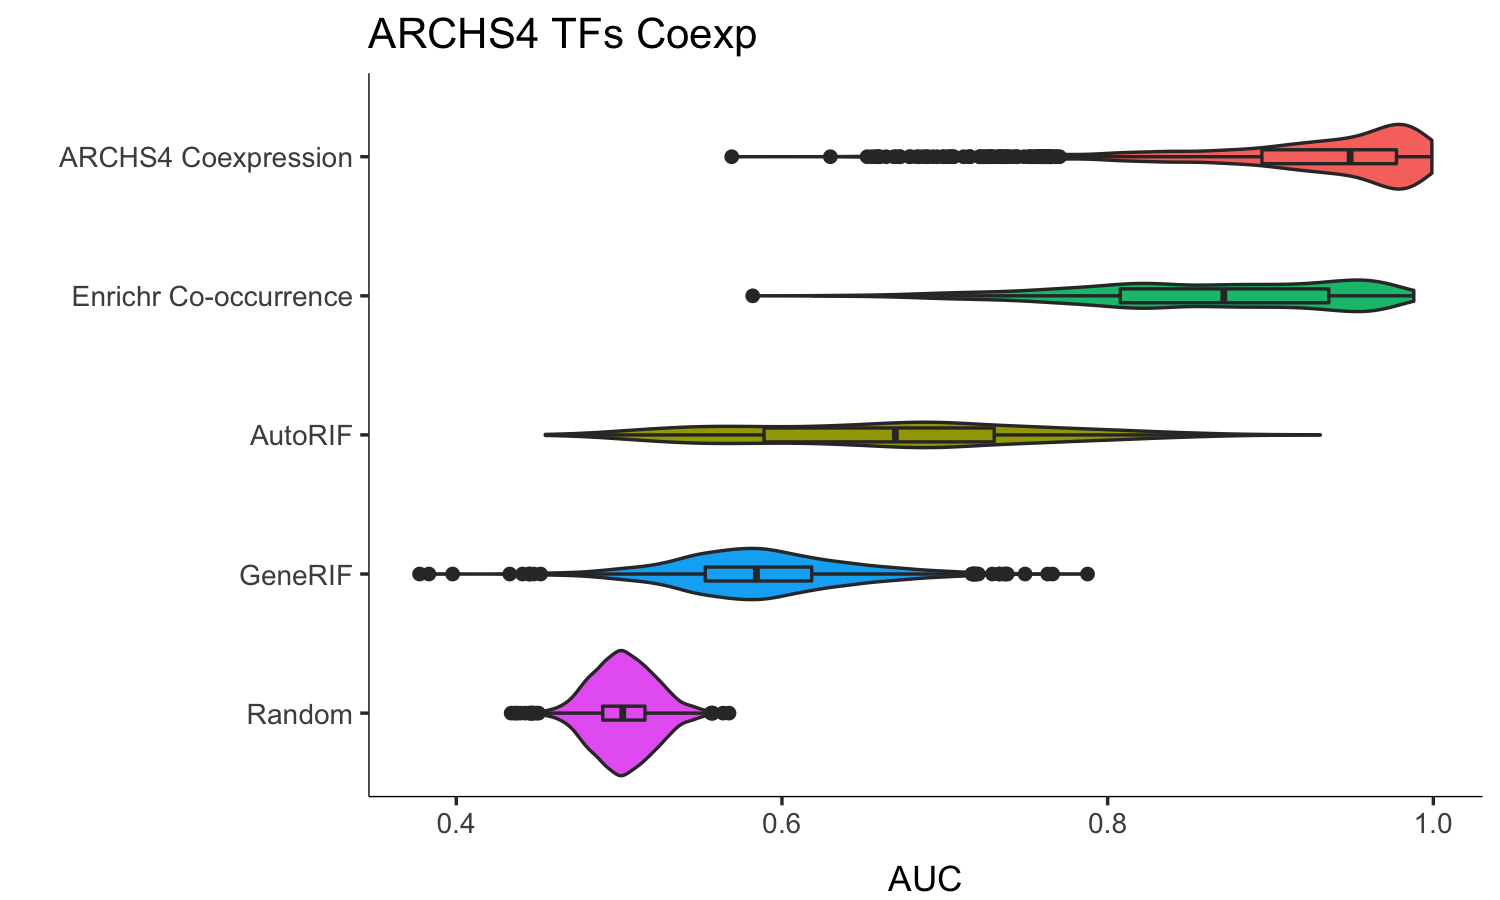

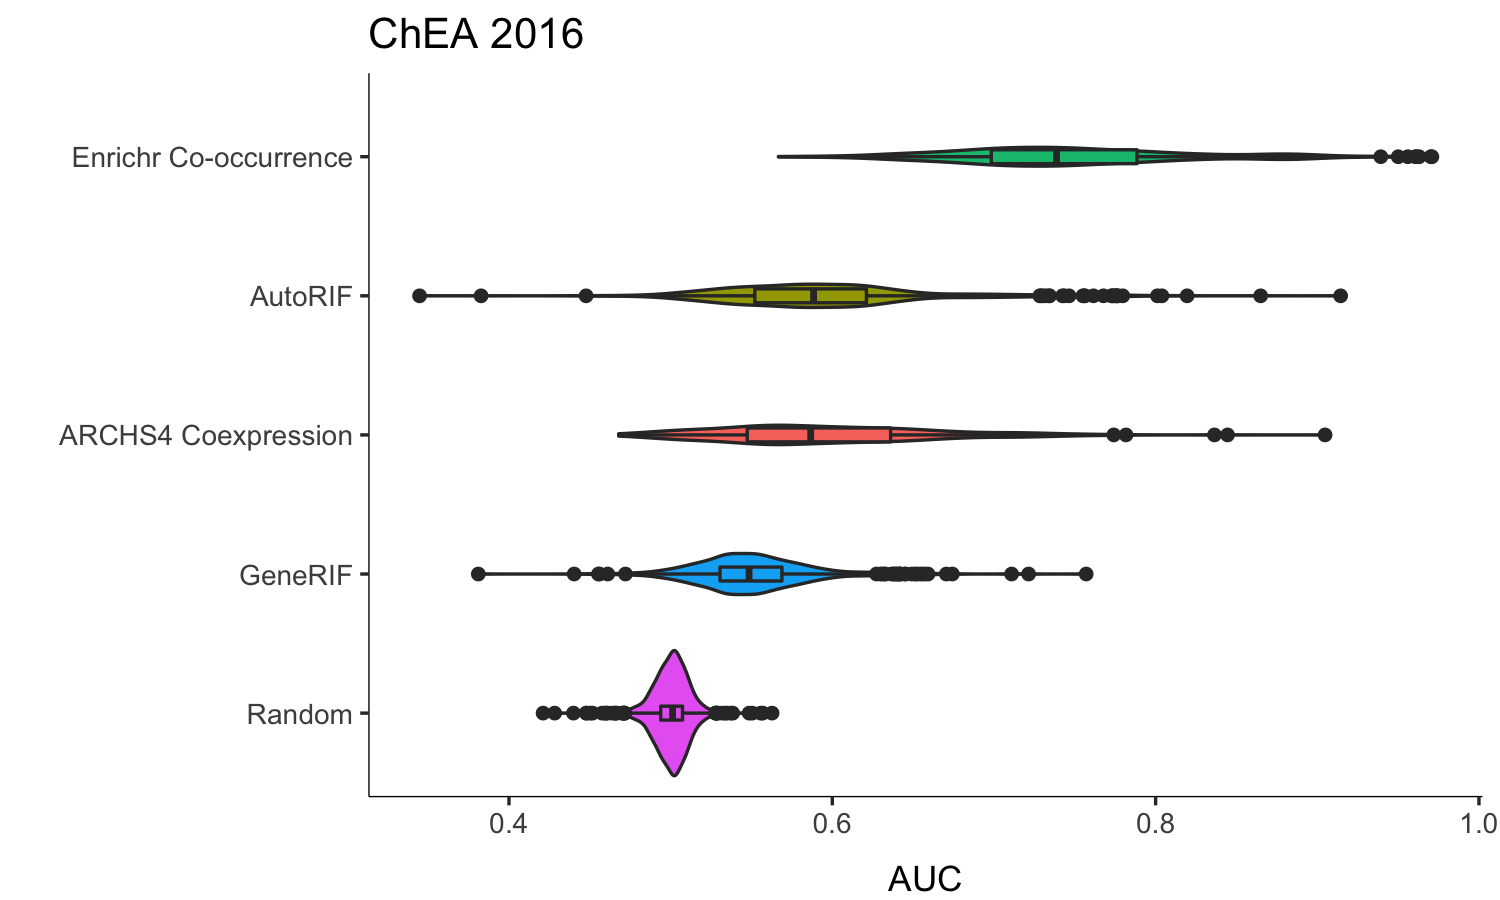

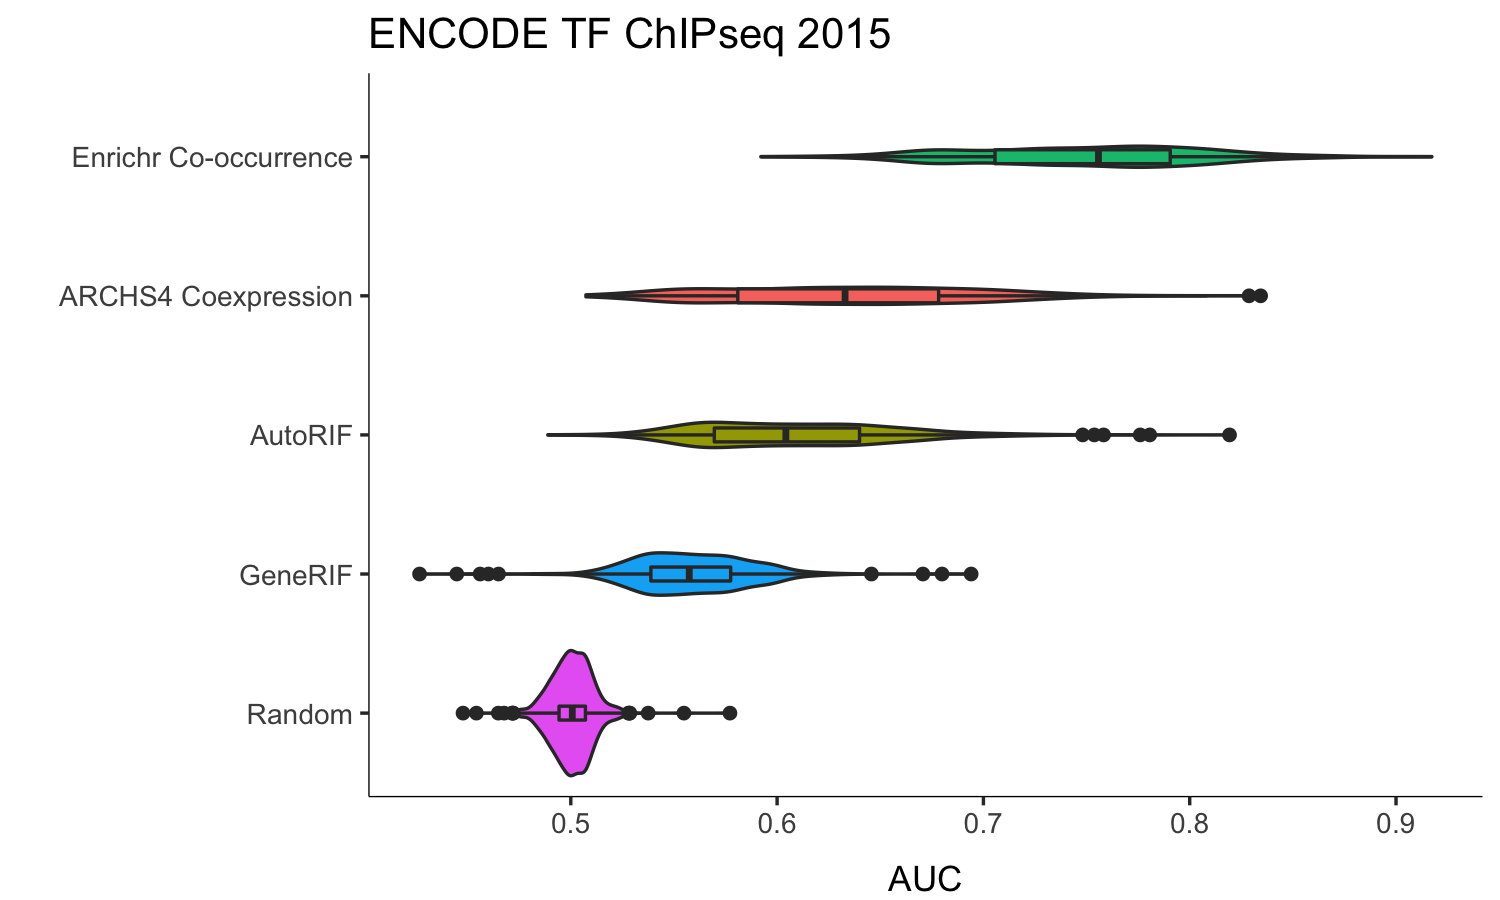

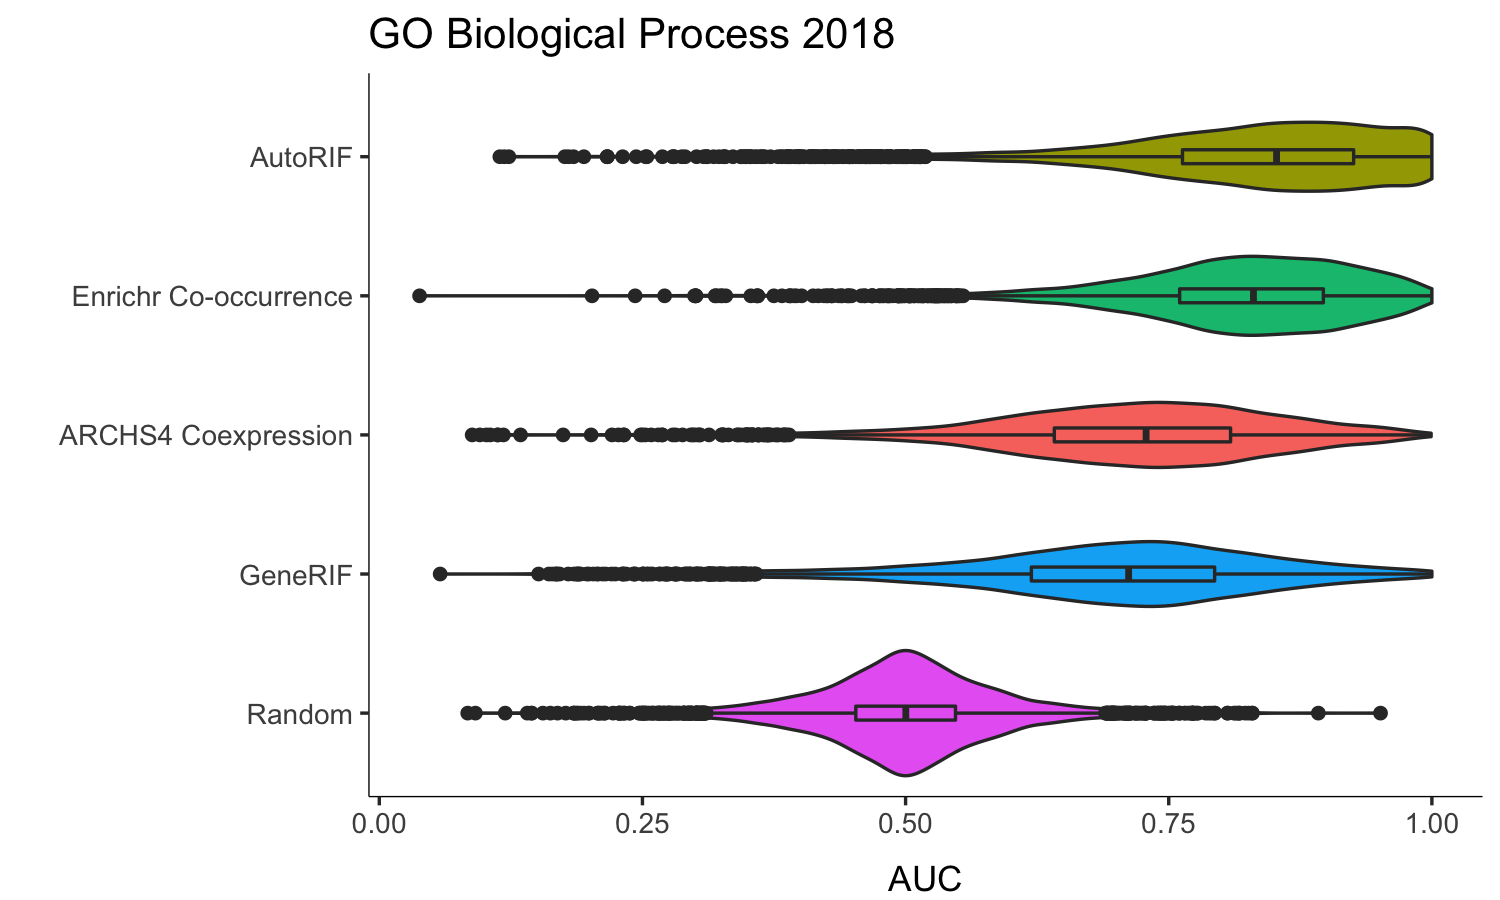

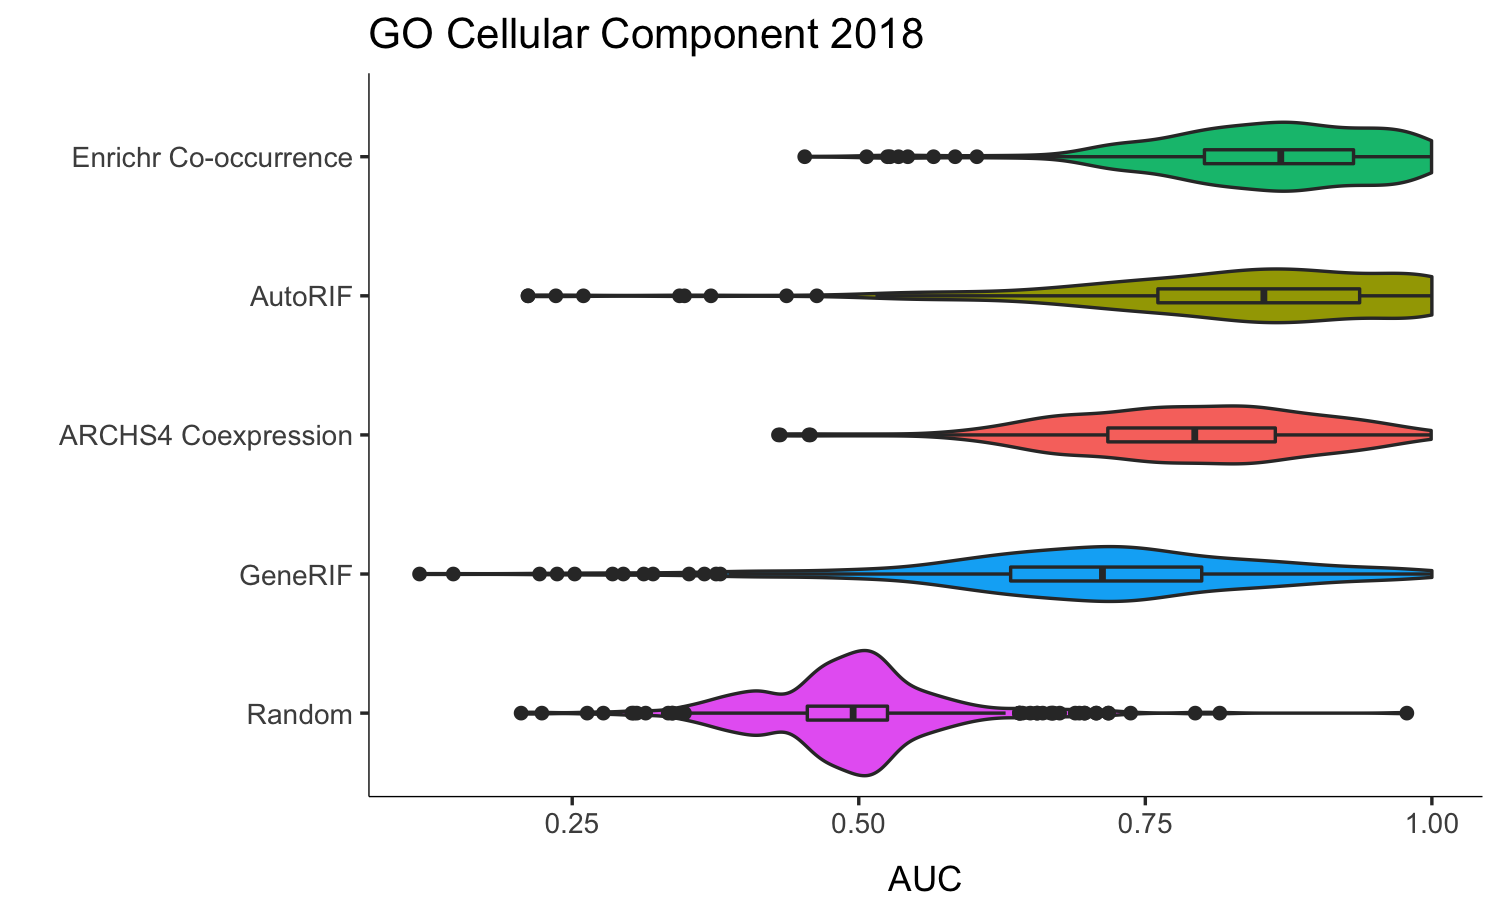

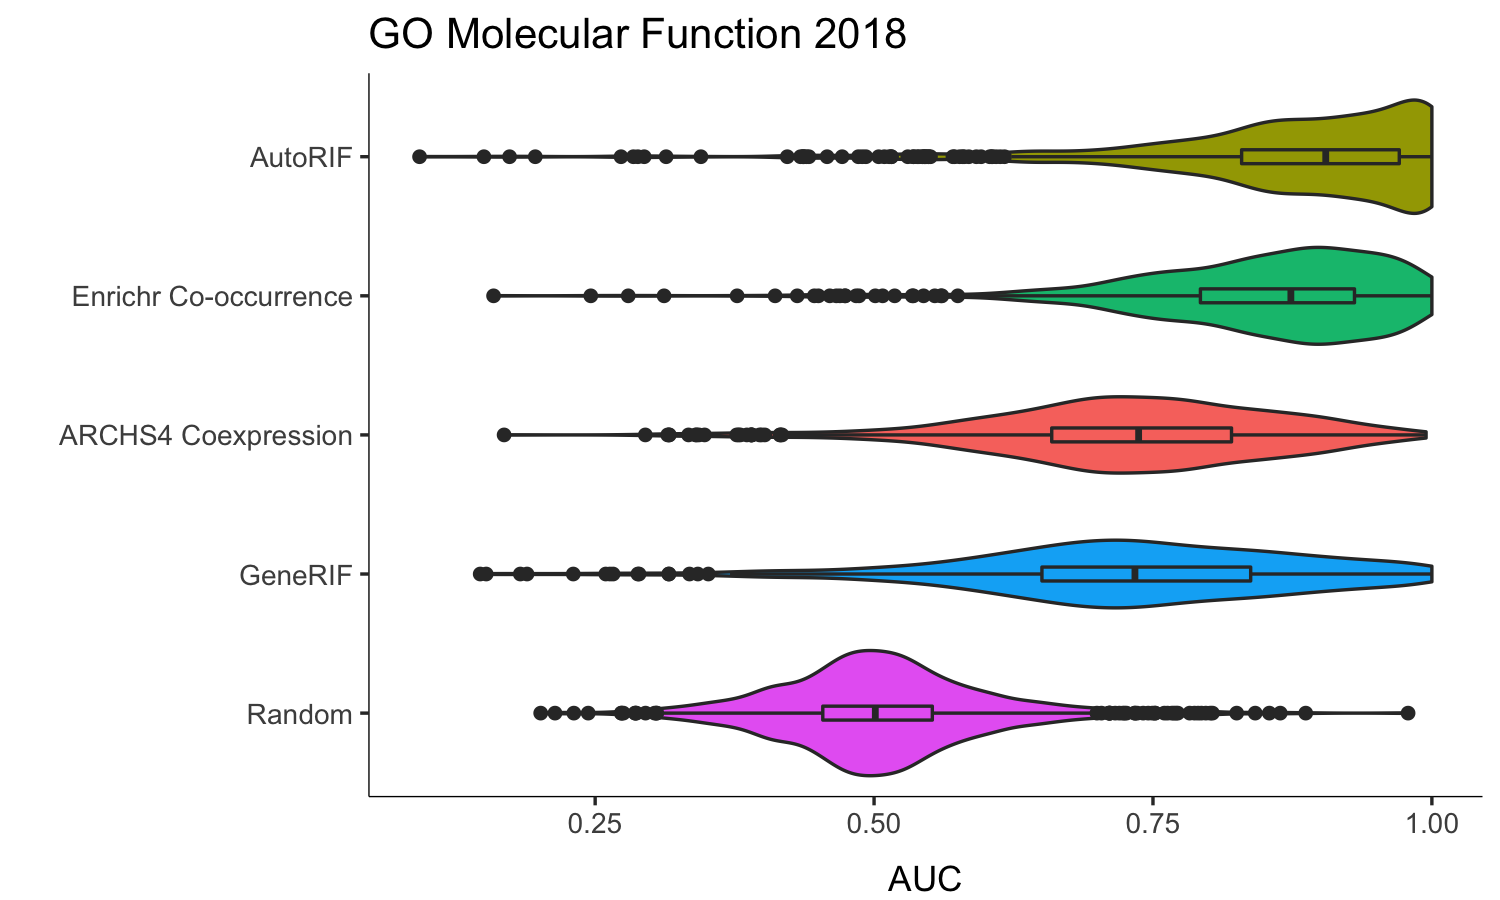

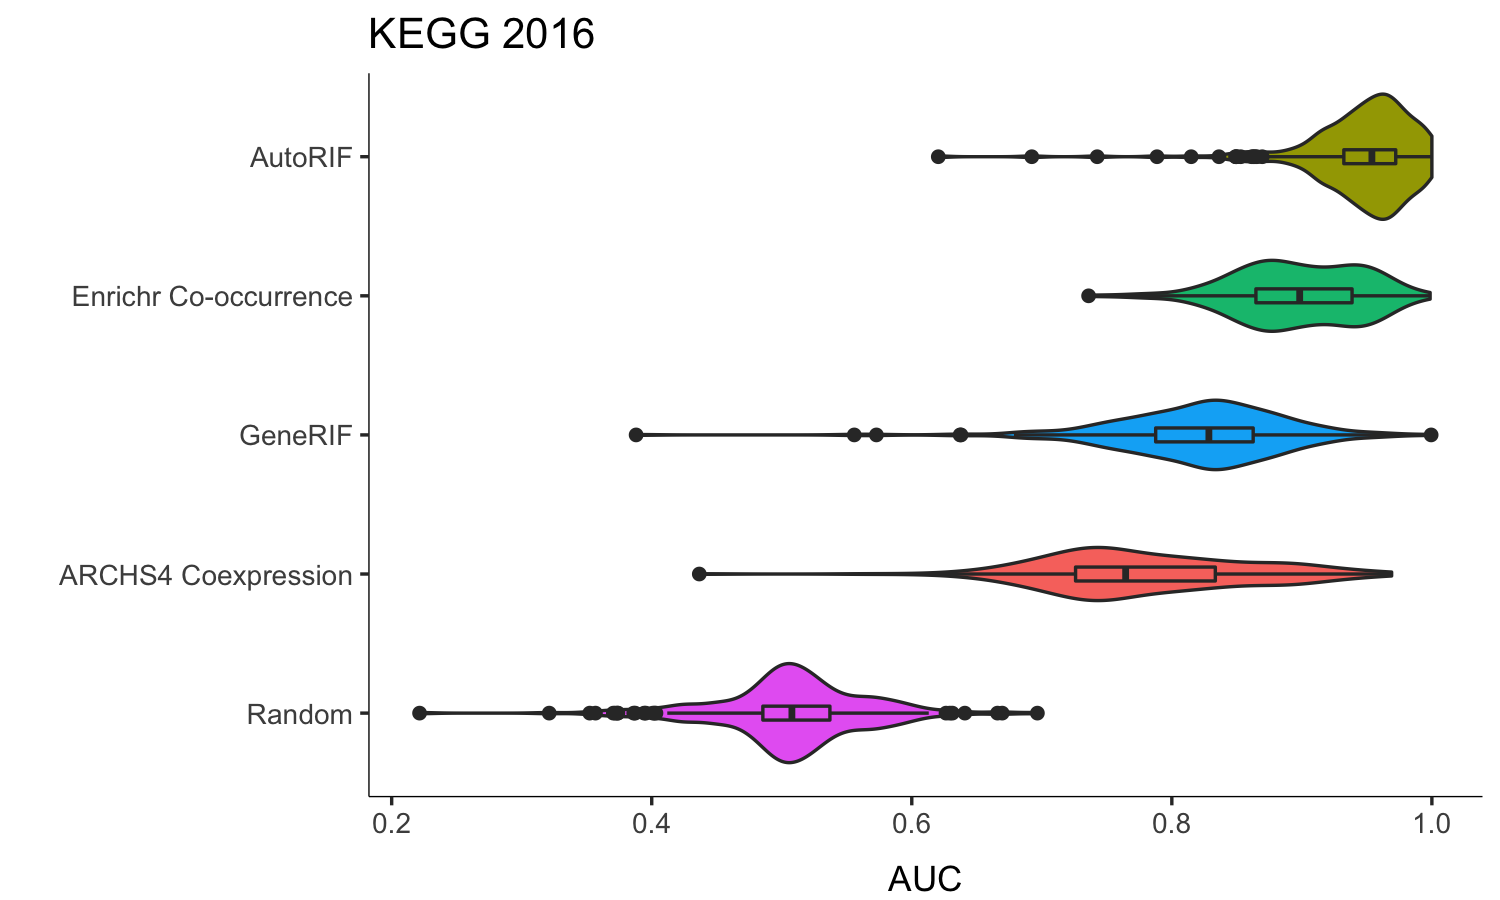

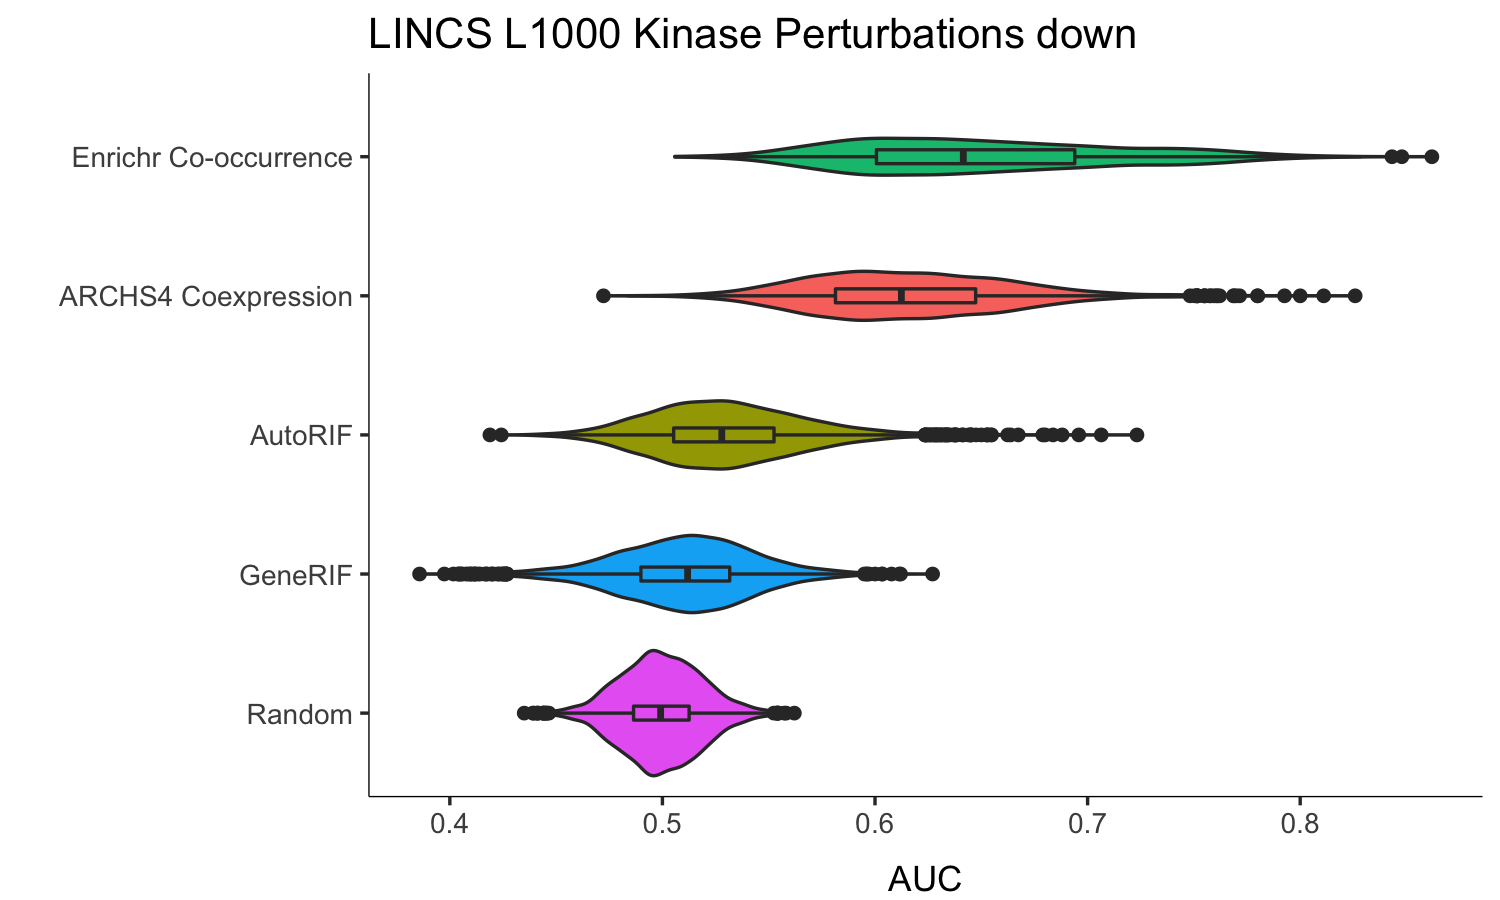

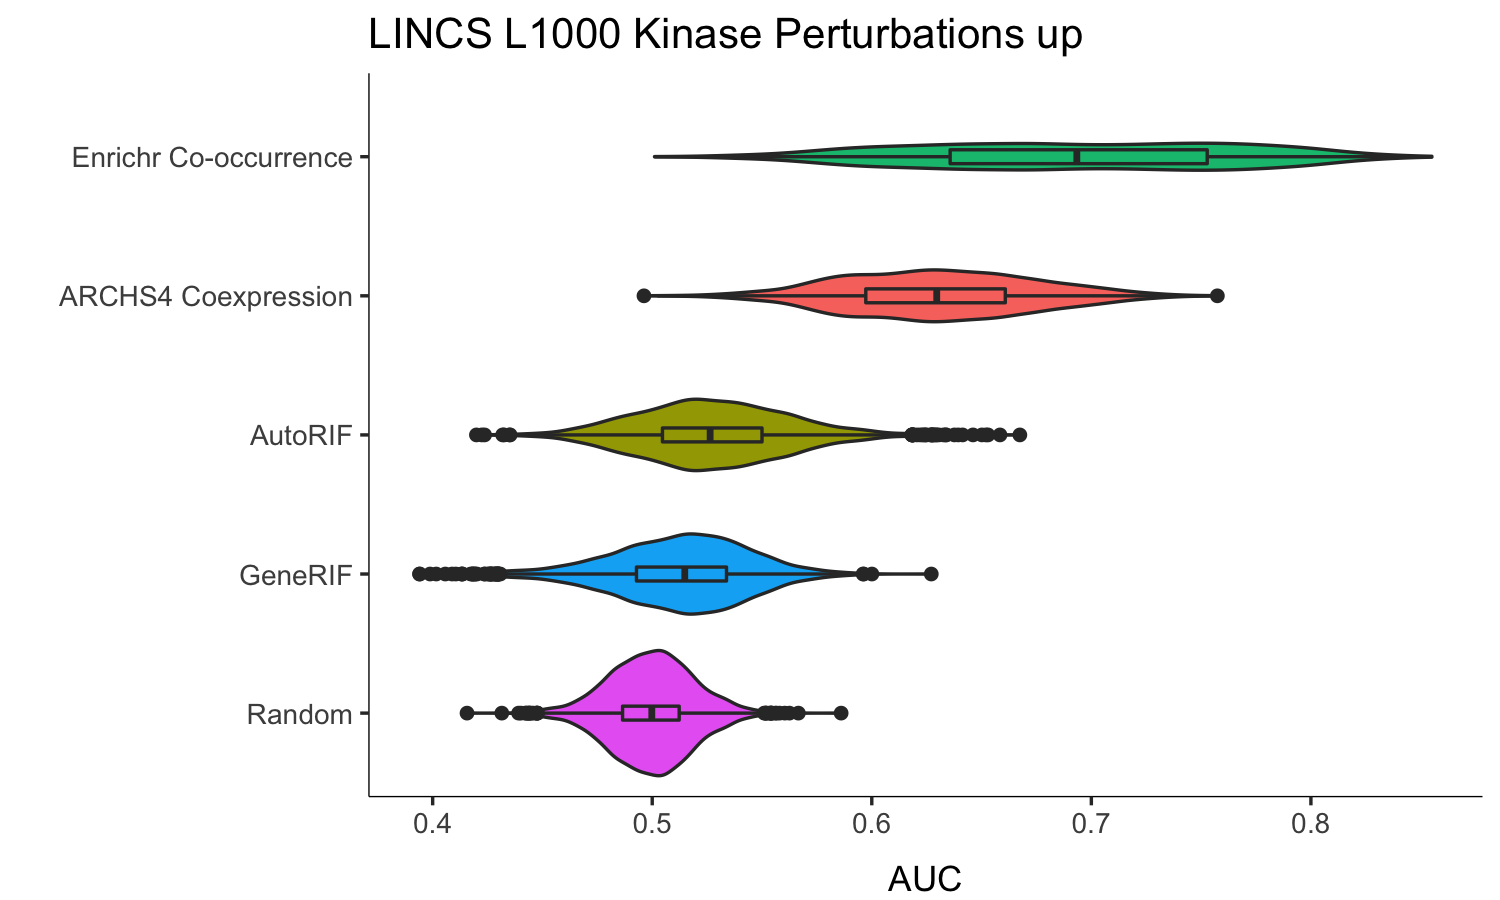

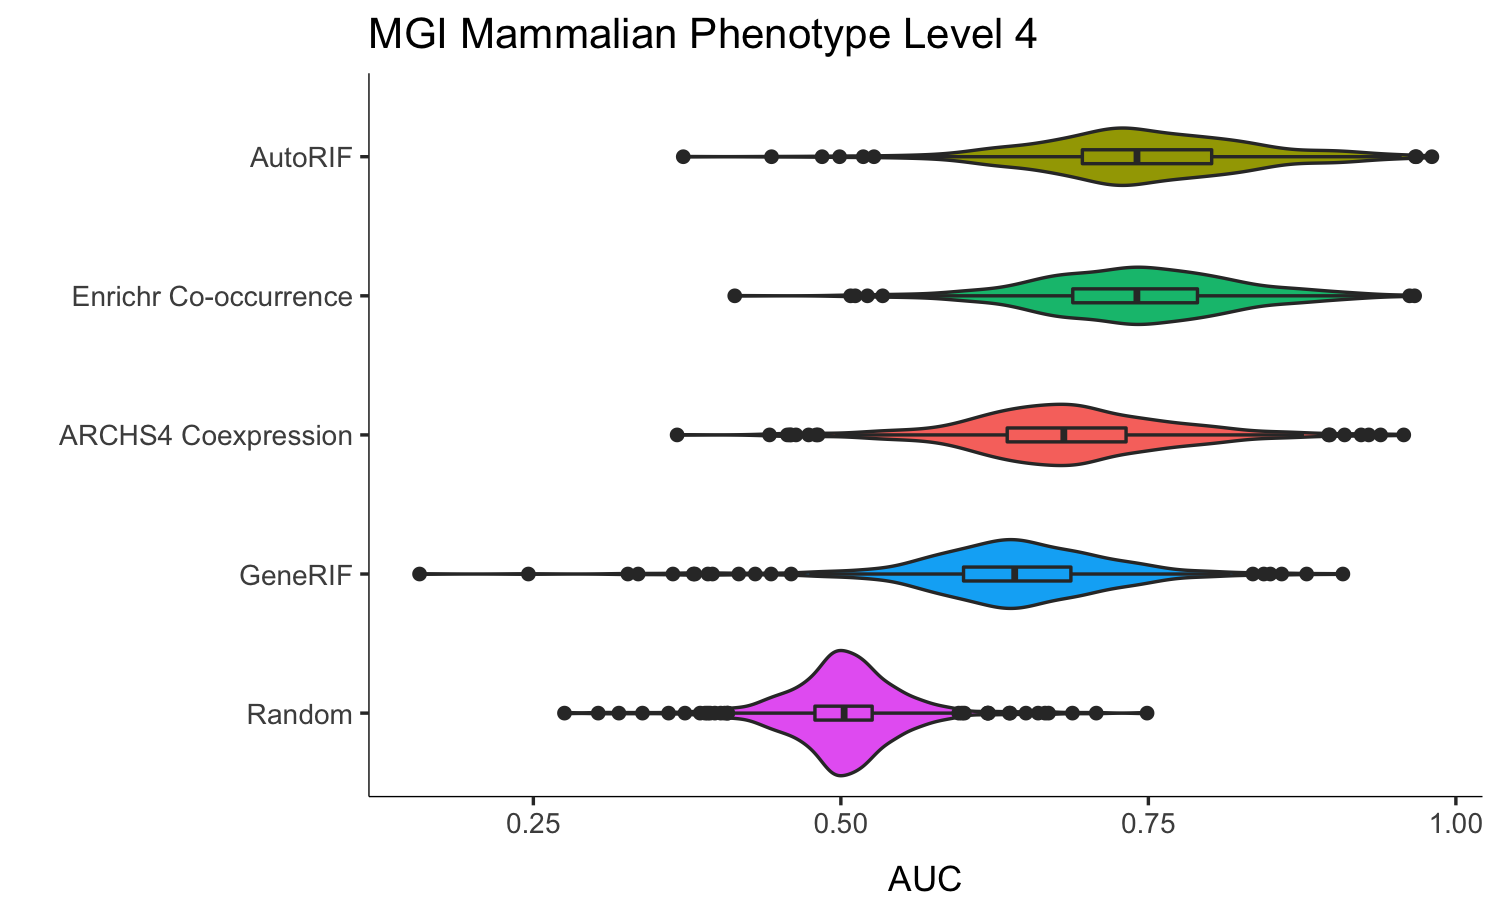

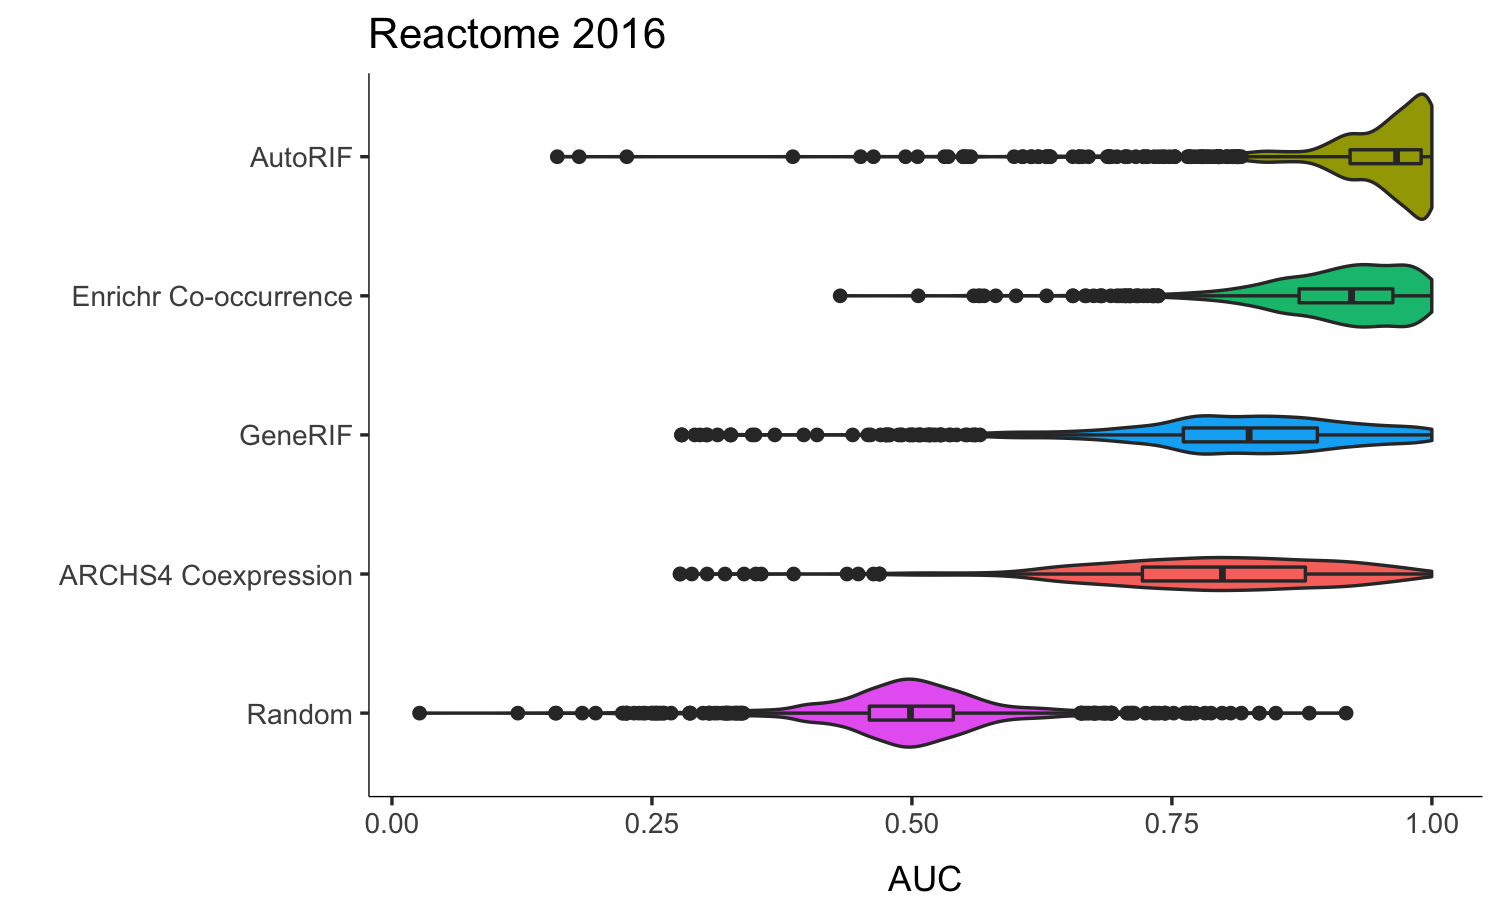

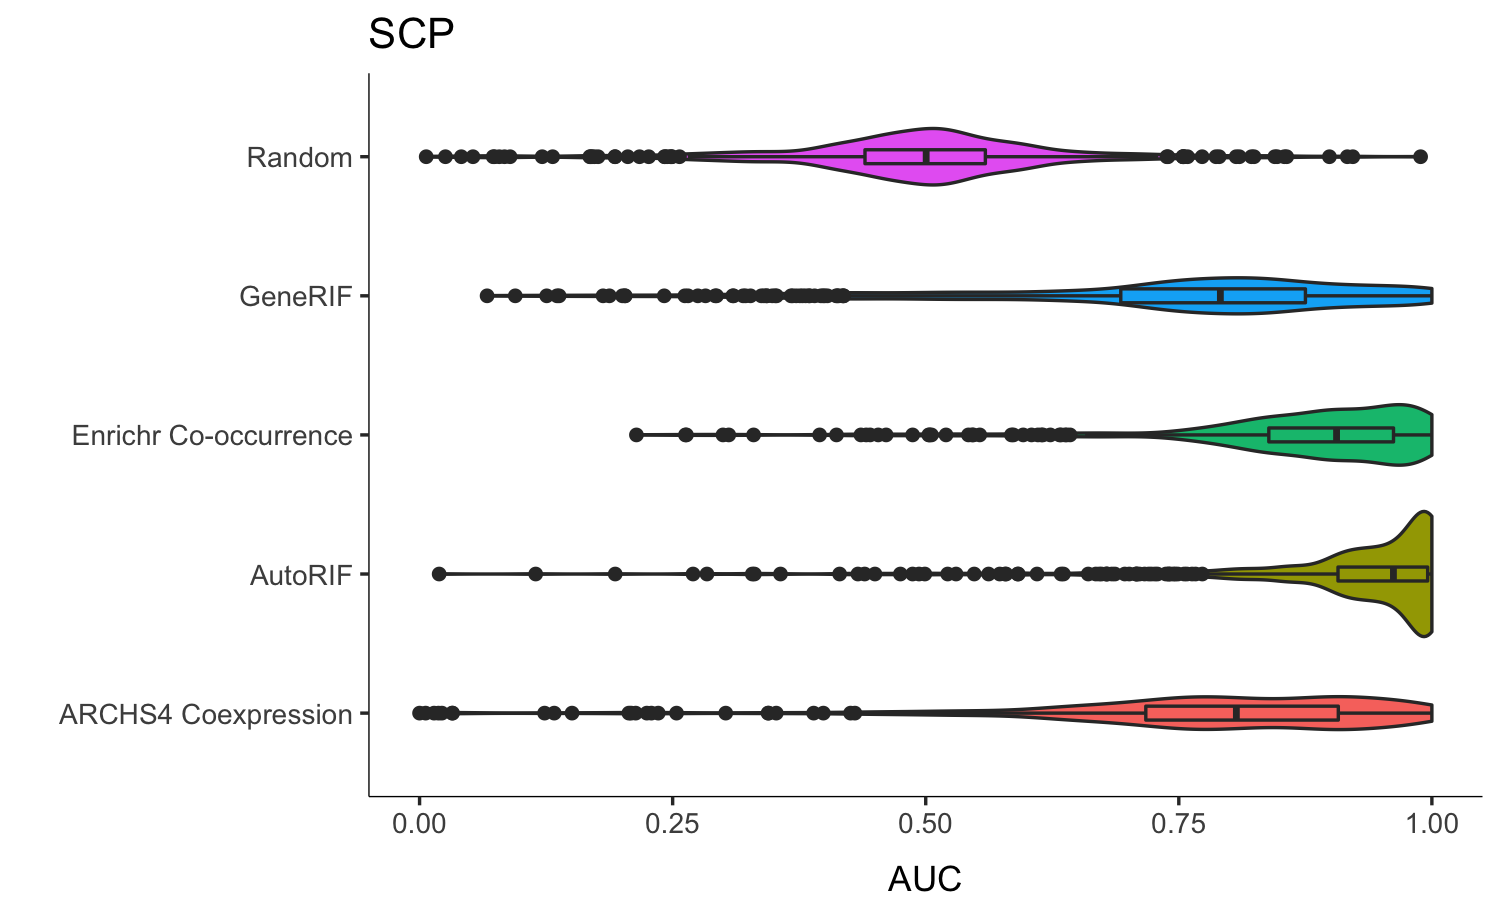

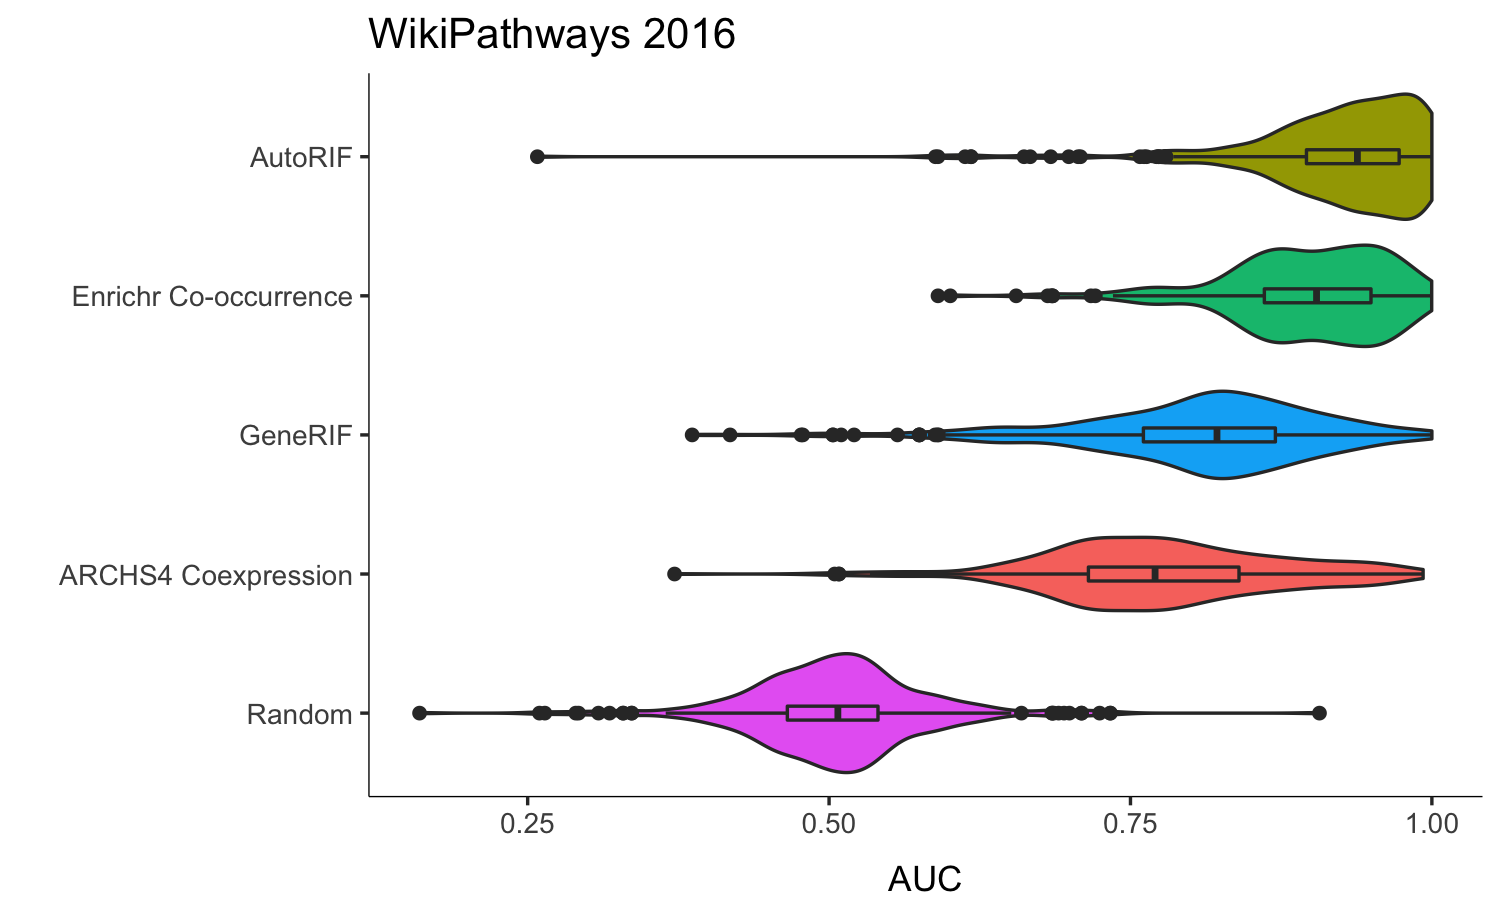

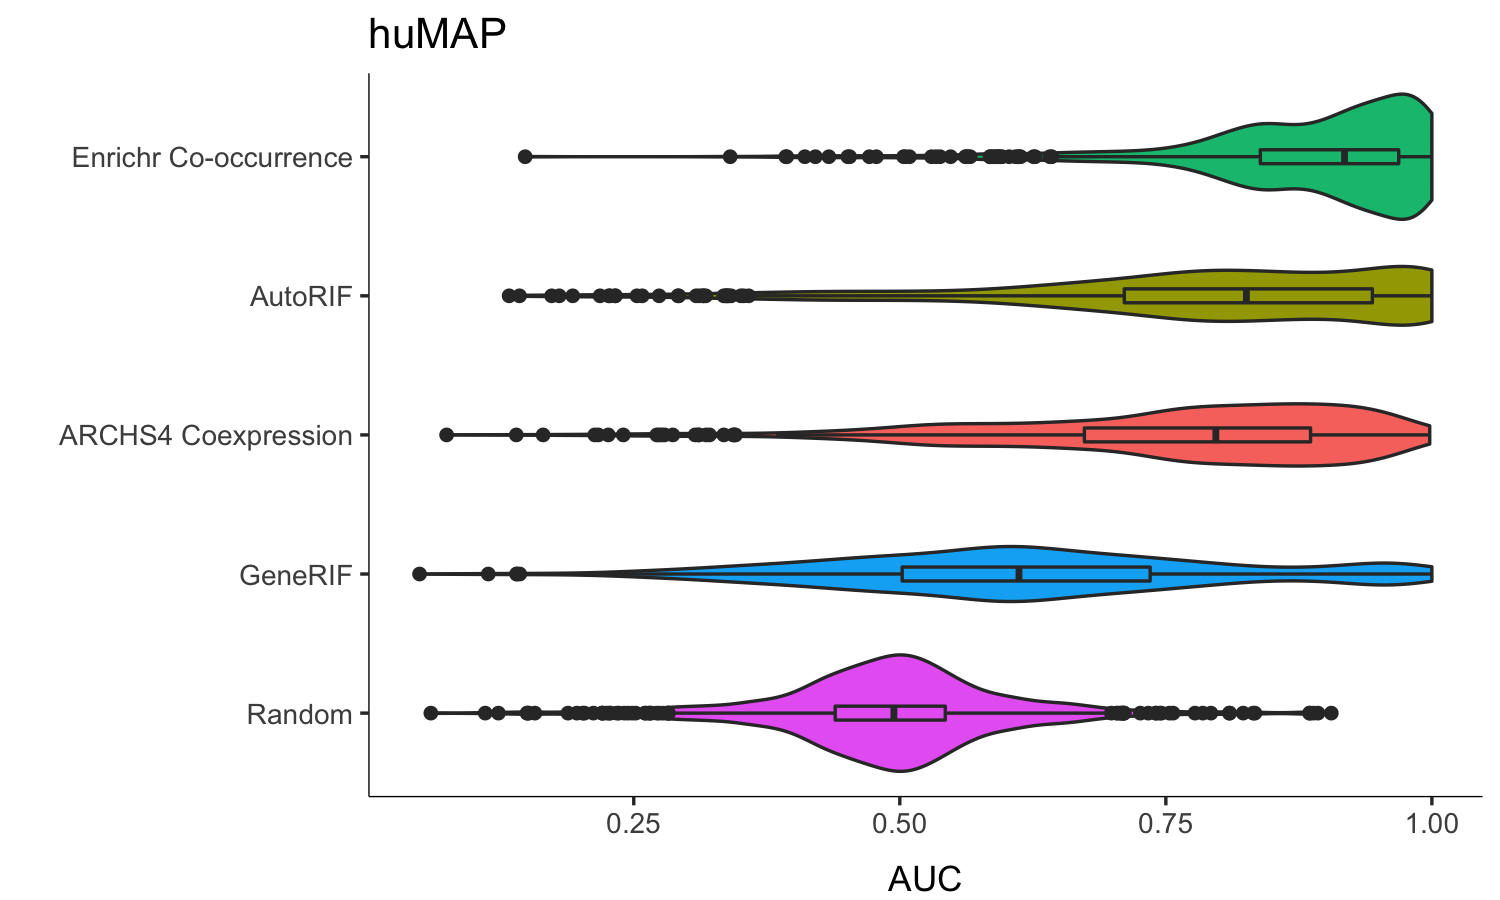

In [53]:
for library in plot_dataframe.library.unique():
    boxplot(library)

In [121]:
def facet_boxplot(libraries):
    ggplot_dataframe = plot_dataframe[[x in libraries for x in plot_dataframe['library']]]
    ggplot_dataframe['library'] = [' '.join(x.replace('huMAP', 'huMAP_').split('_')[:-1]) for x in ggplot_dataframe['library']]
    %R -i ggplot_dataframe -h 500 -w 1500 -r 210 ticks<-c(0,.25,0.50,.75,1); ggplot_dataframe$normalization <- factor(ggplot_dataframe$normalization, levels=c('Random', 'GeneRIF', 'ARCHS4 Coexpression', 'AutoRIF', 'Enrichr Co-occurrence')); ggplot_dataframe$library <- factor(ggplot_dataframe$library, levels=c('huMAP', 'GO Biological Process', 'Reactome')); gp <- ggplot(ggplot_dataframe, aes(x=normalization, y=auc, fill=normalization)) + scale_y_continuous(breaks=ticks, labels=ticks) + facet_wrap(~library) + geom_violin() + guides(fill=FALSE) + geom_boxplot(width=.1, outlier.size=0) + labs(x='', y='AUC') + theme_classic() + theme(axis.title.x = element_text(vjust=-1), axis.title.y = element_text(vjust=2.5), axis.line = element_line(colour = 'black', size=0.2), strip.background = element_rect(color='black', fill='white', size=0)) + coord_flip(); print(gp); 
    

/Users/denis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



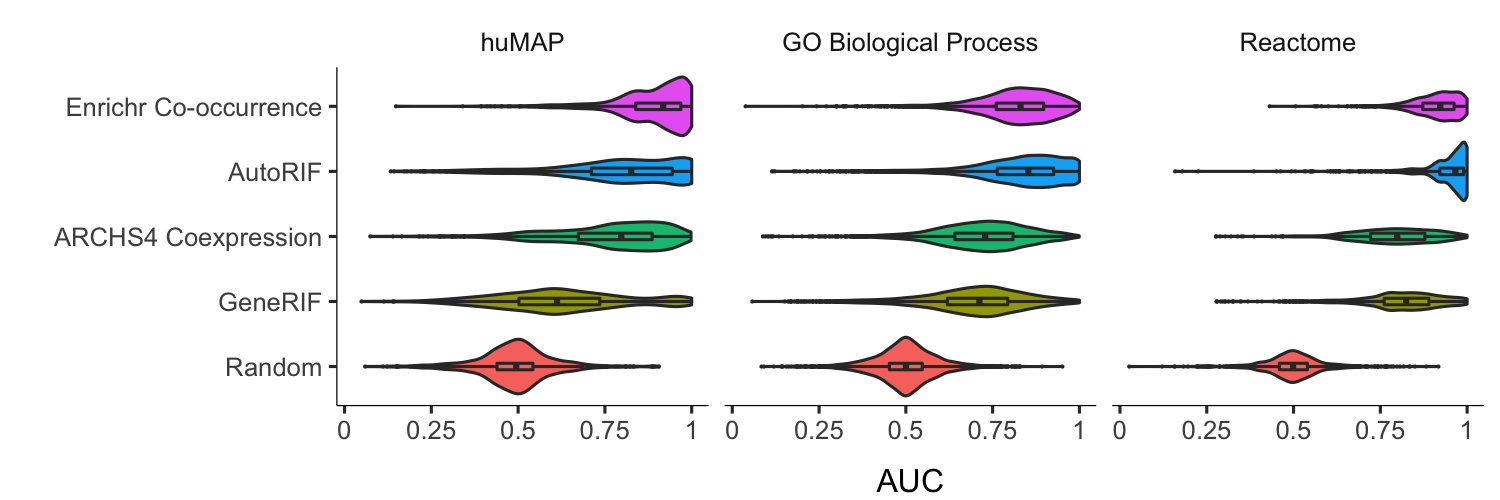

In [122]:
facet_boxplot(['GO_Biological_Process_2018', 'Reactome_2016', 'huMAP'])

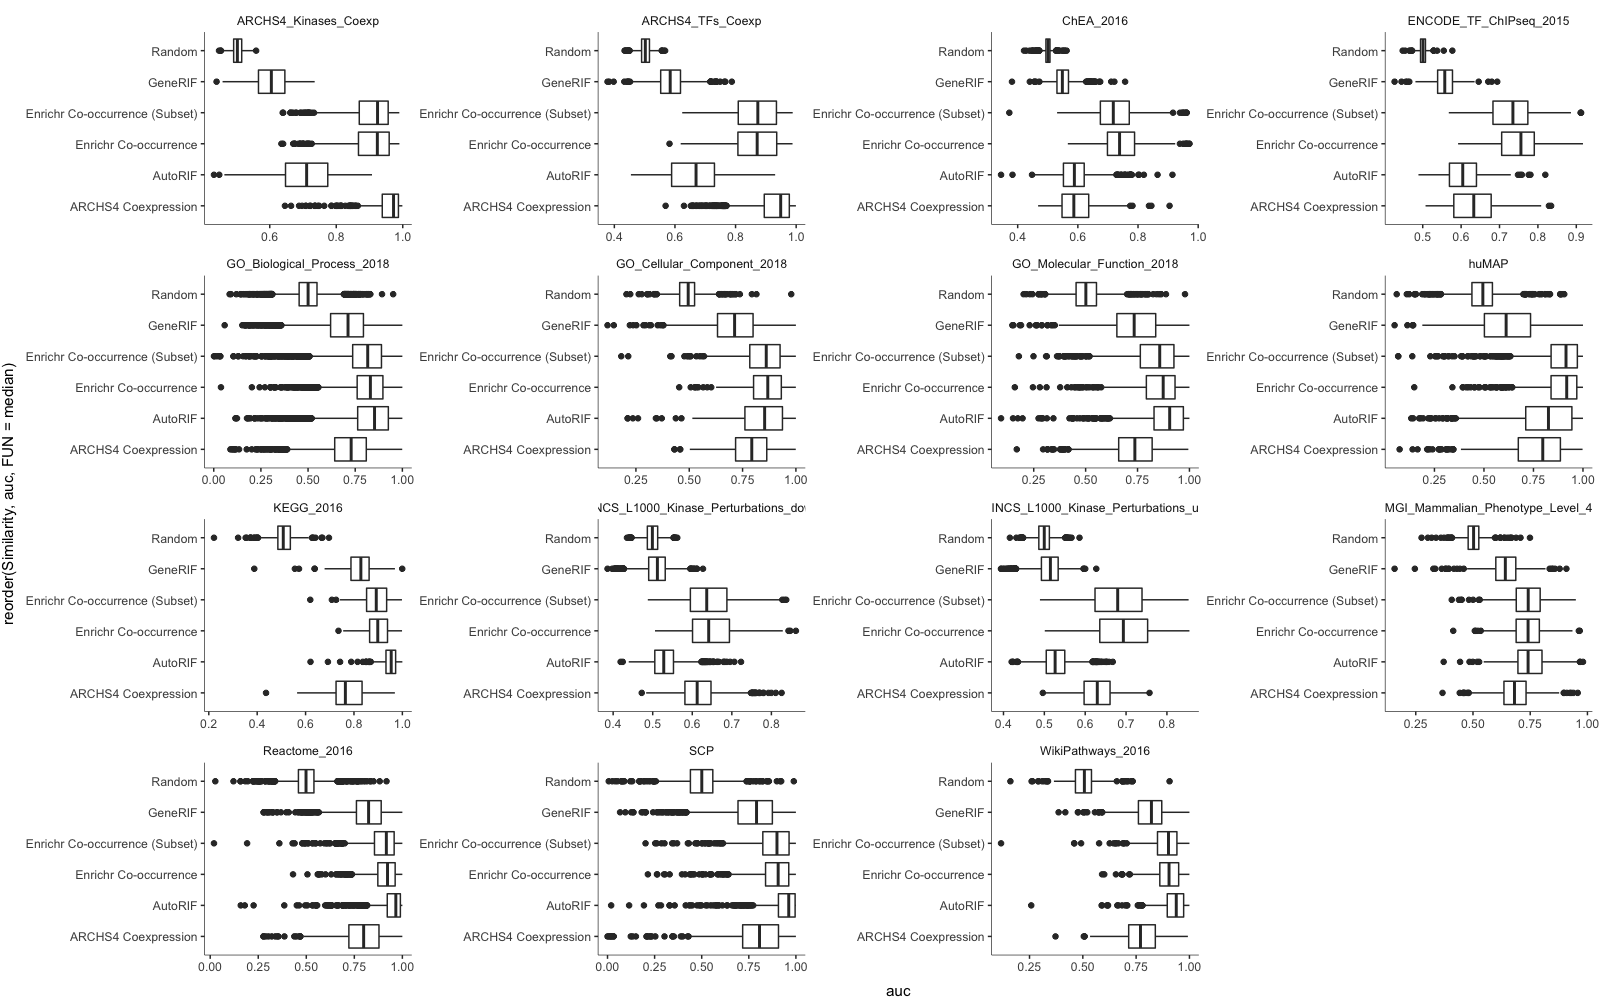

In [24]:
%%R -i plot_dataframe -h 1000 -w 1600 -r 100
#ticks <- seq()
ggplot(plot_dataframe, aes(x=reorder(Similarity, auc, FUN=median), y=auc)) +
geom_boxplot() +
facet_wrap(~library, scales='free') +
coord_flip() +
#scale_fill_manual(values=c('', '')) +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_x_log10() +
#scale_y_log10() +
#scale_x_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks, trans='log10') +
#ggtitle('') +
#geom_abline(intercept=0, slope=1) +
#xlab('') +
#ylab('') +
#labs(title = '', x = '', y = '', color = '', fill='') +
#guides(fill=FALSE) +
theme_classic() +
theme(axis.title.x = element_text(vjust=-1), axis.title.y = element_text(vjust=2.5), axis.line = element_line(colour = 'black', size=0.2), strip.background = element_rect(color='black', fill='white', size=0))